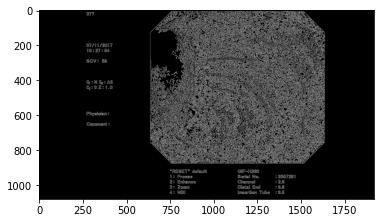

In [48]:
#augmentation
from glob import glob
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# internal data로 예시 확인
img_path2 = '/mnt/nas100_vol2/LeeJungHoon/AOV_task(binary_clssification)/AOV_data/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_internal_V4/10535370__2016-11-07__305d.jpg'
image_gray_2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2GRAY)
img_2 = np.array(image_gray_2, dtype=np.uint8)

#external data를 이용해서 예시 확인
img_path = '/mnt/nas100_vol2/LeeJungHoon/AOV_task(binary_clssification)/AOV_data/추가 비정상 데이터/추가 외부_내부 데이터/비정상 외부(2016~2022)/18396966 이승섭 2017-07-11 (외부자료-저장) 내시경 205d.jpg'
# img_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/29985056__2020-10-28_205d.jpg'
image_gray_ = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
img_ = np.array(image_gray_, dtype=np.uint8)

#min value와 max value를 모두 낮추어서 추출되는 엣지가 많게 만들기
edge1 = cv2.Canny(img_,10,70)
edge2 = cv2.Canny(img_2,10,70)
plt.imshow(edge1,cmap='gray')
# plt.axis('off')
# edge1[1,:]

- vertical, horizontal 방향으로 최소, 최대픽셀 값을 0,1로 만들어주고, 합을 구해준다
- 합을 구했을 때 200보다 큰 순간의 idx를 추출

In [2]:
#vertical
print(edge2.shape)
line = edge1[140,:]
print(np.sum(line/255))
# print(line)

line_right = edge1[:,-33]
print(np.sum(line_right/255))
# print(line)

(480, 640)
231.0
0.0


In [3]:
#horizontal
print(edge1.shape)
line_vertical = edge2[28,:]
# print(len(line_vertical))
print(np.sum(line_vertical/255))
# print(line)

# line_down = edge1[:,-80]
# print(np.sum(line_down/255))
# # print(line)

(1080, 1920)
2.0


In [13]:
line_vertical = edge2[:,-1] # edge shape : 480,640

len_width = len(edge2[144,:])
print(len_width)

#vertical 방향으로 idx 확인
img_index_left = []
img_index_right = []
  
for i in range(len_width):
    vertical_sum_left = np.sum(edge2[:,i]/255)
    # vertical_sum_left = np.sum(edge1[:,i])
    # print(np.sum(edge1[:,i])/255)
    if vertical_sum_left > 110:
        img_index_left.append(i)
        
    #gray scale의 각 픽셀 값이 8비트이기 때문에 255로 나누어 주기
    vertical_sum_right = np.sum(edge2[:,-(i+1)]/255)
    # vertical_sum_right = np.sum(edge1[:,-(i+1)])
    
    if vertical_sum_right > 100:
        real_right_idx = len_width - (i+1) 
        img_index_right.append(real_right_idx)    
    
print(img_index_left[0],img_index_right[0])

640
143 607


In [14]:
line_horizontal = edge2[144,:] # edge shape : 480,640

len_height = len(edge2[:,144])
print(len_height)
#horizontal 방향으로 idx 확인
img_index_up = []
img_index_down = []
for i in range(len_height):
    
    horizontal_sum_up = np.sum(edge2[i,:]/255)
    if horizontal_sum_up > 200:
        img_index_up.append(i)
        
    horizontal_sum_down = np.sum(edge2[-(i+1),:]/255)
    horizontal_sum_end = np.sum(edge2[-1,:]/255)
    
    # horizontal_sum_down = np.sum(edge1[-(i+1),:])
    # horizontal_sum_end = np.sum(edge1[-1,:])
    
    if horizontal_sum_down > 200:
        if horizontal_sum_end == 2:
            real_down_idx = 479
            img_index_down.append(real_down_idx)    
        else:
            real_down_idx = len_height - (i+1) 
            img_index_down.append(real_down_idx)    
    
print(img_index_up[0],img_index_down[0])

480
36 443


In [15]:
img = img_2[img_index_up[0]:img_index_down[0], img_index_left[0]:img_index_right[0]]

(-0.5, 463.5, 406.5, -0.5)

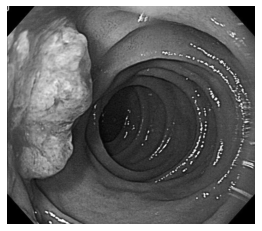

In [16]:
plt.imshow(img,cmap='gray')
plt.axis('off')

## 허프 라인 변환(Hough line transformation)를 이용한 test
- Open CV에서 제공하는 line을 검출하는 알고리즘으로 허프 라인 변환(Hough line transformation)을 위한 HoughLine이라는 함수를 이용한 test

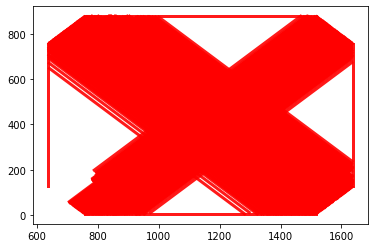

In [29]:
lines = cv2.HoughLinesP(edge1, 1, np.pi/180 , 400, lines=None, minLineLength=300, maxLineGap=30)
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=3, alpha=0.9)
# plt.title("확률적 Hough 변환으로 추출한 직선")

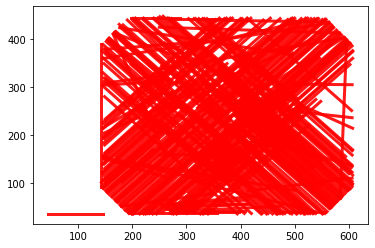

In [42]:
lines_2 = cv2.HoughLinesP(edge2, 1, np.pi/180 , 80, lines=None, minLineLength=80, maxLineGap=10)
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines_2[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=3, alpha=0.9)
# plt.title("확률적 Hough 변환으로 추출한 직선")

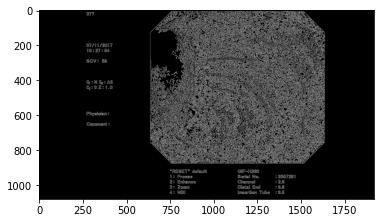

In [44]:
plt.imshow(edge1,cmap='gray')
# plt.axis('off')

In [11]:
same_vertical_line = []
same_horizontal_line = []

for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        if x1 == x2:
            same_vertical_line.append(lines[i])
        if y1 == y2:
            same_horizontal_line.append(lines[i])
                # plt.plot([x1, x2], [y1, y2], c='r', lw=3, alpha=0.9)

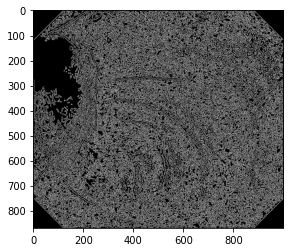

In [12]:
edge1 = edge1[same_horizontal_line[1][0][1]:same_horizontal_line[0][0][1], same_vertical_line[0][0][0]:same_vertical_line[1][0][0] ]
plt.imshow(edge1,cmap='gray')

In [40]:
print(same_horizontal_line[0][0][1])
print(same_horizontal_line[1][0][1])

876
7


In [35]:
same_horizontal_line

[array([[ 758,  876, 1517,  876]], dtype=int32),
 array([[ 758,    7, 1517,    7]], dtype=int32)]

In [36]:
same_vertical_line

[array([[637, 754, 637, 129]], dtype=int32),
 array([[1637,  756, 1637,  127]], dtype=int32)]

In [39]:
print(same_vertical_line[0][0][0])
print(same_vertical_line[1][0][0])

637
1637


In [26]:
edge2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## opening 방법을 함께 이용
1. opening을 이용하여 텍스트 제거 
2. canny edge 방법을 이용하여 index 찾기
3. 찾은 index를 original image에 적용하여 cropping 진행

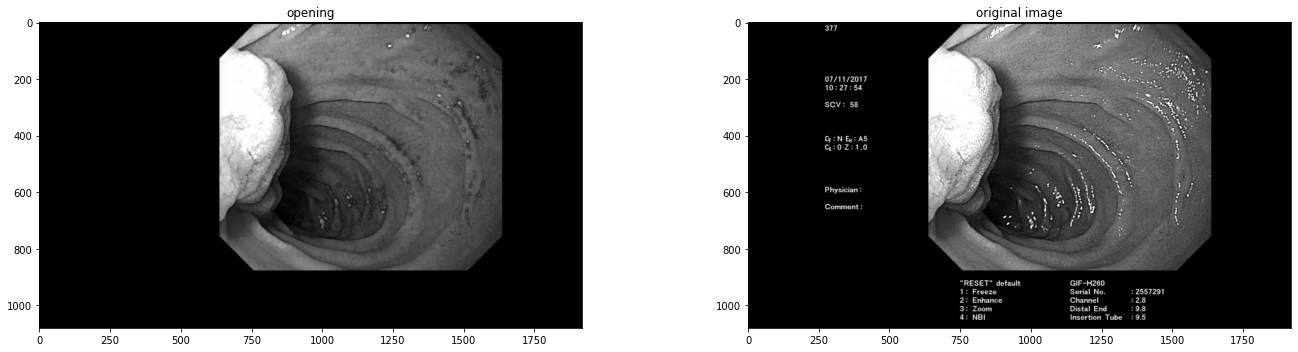

In [54]:
# cv2.bilateralFilter(img_, d, sigmaColor, sigmaSpace[, dst[, borderType]])

# kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_, cv2.MORPH_OPEN, kernel, iterations = 3)

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(opening, cmap='gray')
plt.title('opening')

plt.subplot(1, 2, 2)
plt.imshow(img_, cmap='gray')
plt.title('original image')

plt.tight_layout()
plt.show()

In [57]:
opening_edge = cv2.Canny(opening,10,70)

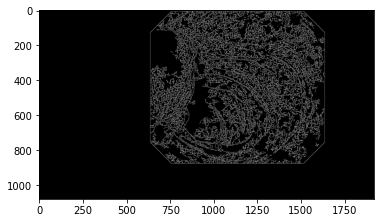

In [58]:
plt.imshow(opening_edge,cmap='gray')

In [59]:
line_vertical = opening_edge[:,-1] # edge shape : 480,640

len_width = len(opening_edge[144,:])
print(len_width)

#vertical 방향으로 idx 확인
img_index_left = []
img_index_right = []
  
for i in range(len_width):
    vertical_sum_left = np.sum(opening_edge[:,i]/255)
    # vertical_sum_left = np.sum(edge1[:,i])
    # print(np.sum(edge1[:,i])/255)
    if vertical_sum_left > 110:
        img_index_left.append(i)
        
    #gray scale의 각 픽셀 값이 8비트이기 때문에 255로 나누어 주기
    vertical_sum_right = np.sum(opening_edge[:,-(i+1)]/255)
    # vertical_sum_right = np.sum(edge1[:,-(i+1)])
    
    if vertical_sum_right > 100:
        real_right_idx = len_width - (i+1) 
        img_index_right.append(real_right_idx)    
    
print(img_index_left[0],img_index_right[0])

line_horizontal = opening_edge[144,:] # edge shape : 480,640

len_height = len(opening_edge[:,144])
print(len_height)
#horizontal 방향으로 idx 확인
img_index_up = []
img_index_down = []
for i in range(len_height):
    
    horizontal_sum_up = np.sum(opening_edge[i,:]/255)
    if horizontal_sum_up > 200:
        img_index_up.append(i)
        
    horizontal_sum_down = np.sum(opening_edge[-(i+1),:]/255)
    horizontal_sum_end = np.sum(opening_edge[-1,:]/255)
    
    # horizontal_sum_down = np.sum(edge1[-(i+1),:])
    # horizontal_sum_end = np.sum(edge1[-1,:])
    
    if horizontal_sum_down > 200:
        if horizontal_sum_end == 2:
            real_down_idx = 479
            img_index_down.append(real_down_idx)    
        else:
            real_down_idx = len_height - (i+1) 
            img_index_down.append(real_down_idx)    
    
print(img_index_up[0],img_index_down[0])

1920
637 1637
1080
6 876


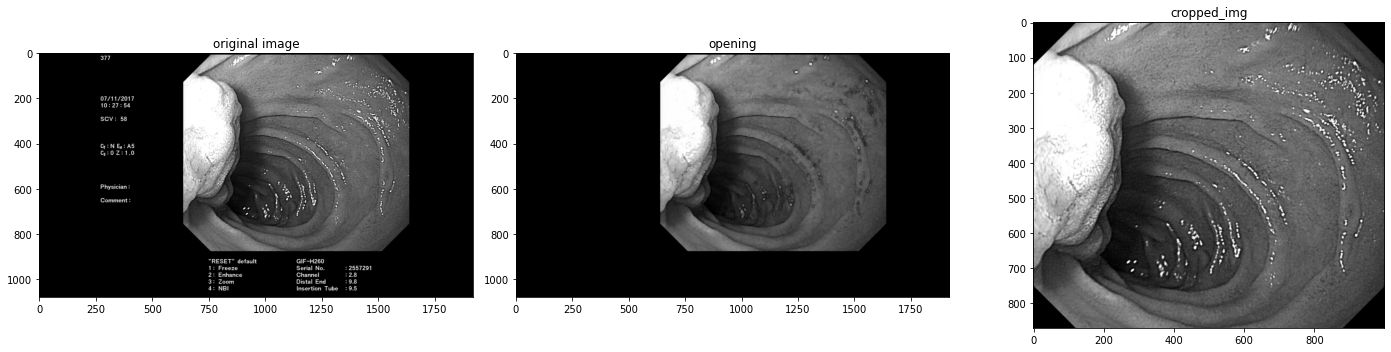

In [60]:
cropped_img = img_[img_index_up[0]:img_index_down[0], img_index_left[0]:img_index_right[0]]

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_, cmap='gray')
plt.title('original image')


plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('opening')

plt.subplot(1, 3, 3)
plt.imshow(cropped_img, cmap='gray')
plt.title('cropped_img')

plt.tight_layout()
plt.show()

### 이미지에 텍스트가 포함된 외부 이미지를 이용하여 test

In [71]:
## 이미지에 텍스트가 포함된 이미지 test

text_img_path = '/mnt/nas100_vol2/LeeJungHoon/AOV_task(binary_clssification)/AOV_data/Aov_task_curation_data/cropped_data/32962958 안종근 2019-03-21 (외부자료-저장) 내시경 305d.jpg'
text_img_gray = cv2.cvtColor(cv2.imread(text_img_path), cv2.COLOR_BGR2GRAY)
text_original_img = np.array(text_img_gray, dtype=np.uint8)

text_img_opening = cv2.morphologyEx(text_img, cv2.MORPH_OPEN, kernel, iterations = 3)
text_img_opening_edge = cv2.Canny(text_img_opening,10,70)

Text(0.5, 1.0, 'text_img_opening')

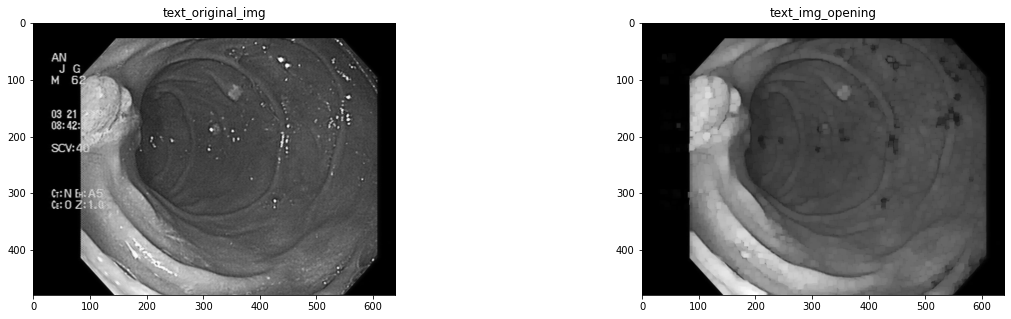

In [72]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(text_original_img, cmap='gray')
plt.title('text_original_img')


plt.subplot(1, 2, 2)
plt.imshow(text_img_opening, cmap='gray')
plt.title('text_img_opening')


In [81]:
line_vertical = text_img_opening_edge[:,-1] # edge shape : 480,640

len_width = len(text_img_opening_edge[144,:])
print(len_width)

#vertical 방향으로 idx 확인
img_index_left = []
img_index_right = []
  
for i in range(len_width):
    vertical_sum_left = np.sum(text_img_opening_edge[:,i]/255)
    # vertical_sum_left = np.sum(edge1[:,i])
    # print(np.sum(edge1[:,i])/255)
    if vertical_sum_left > 110:
        img_index_left.append(i)
        
    #gray scale의 각 픽셀 값이 8비트이기 때문에 255로 나누어 주기
    vertical_sum_right = np.sum(text_img_opening_edge[:,-(i+1)]/255)
    # vertical_sum_right = np.sum(edge1[:,-(i+1)])
    
    if vertical_sum_right > 100:
        real_right_idx = len_width - (i+1) 
        img_index_right.append(real_right_idx)    
    
print(img_index_left[0],img_index_right[0])

line_horizontal = text_img_opening_edge[144,:] # edge shape : 480,640

len_height = len(text_img_opening_edge[:,144])
print(len_height)
#horizontal 방향으로 idx 확인
img_index_up = []
img_index_down = []
for i in range(len_height):
    
    horizontal_sum_up = np.sum(text_img_opening_edge[i,:]/255)
    if horizontal_sum_up > 200:
        img_index_up.append(i)
        
    horizontal_sum_down = np.sum(text_img_opening_edge[-(i+1),:]/255)
    horizontal_sum_end = np.sum(text_img_opening_edge[-1,:]/255)
    
    # horizontal_sum_down = np.sum(edge1[-(i+1),:])
    # horizontal_sum_end = np.sum(edge1[-1,:])
    
    if horizontal_sum_down > 200:
        if horizontal_sum_end != 0:
            real_down_idx = len_height-1
            img_index_down.append(real_down_idx)    
        else:
            real_down_idx = len_height - (i+1) 
            img_index_down.append(real_down_idx)    
    
print(img_index_up[0],img_index_down[0])

640
83 606
480
27 479


In [80]:
np.sum(text_img_opening_edge[-1,:]/255)

39.0

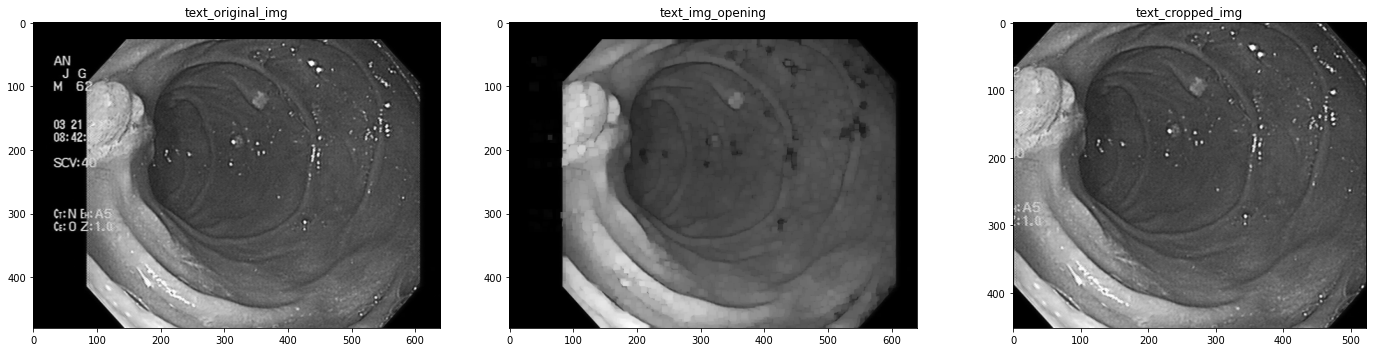

In [82]:
text_cropped_img = text_original_img[img_index_up[0]:img_index_down[0], img_index_left[0]:img_index_right[0]]

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(text_original_img, cmap='gray')
plt.title('text_original_img')


plt.subplot(1, 3, 2)
plt.imshow(text_img_opening, cmap='gray')
plt.title('text_img_opening')

plt.subplot(1, 3, 3)
plt.imshow(text_cropped_img, cmap='gray')
plt.title('text_cropped_img')

plt.tight_layout()
plt.show()

In [93]:
kernel = np.ones((10,10), np.uint8)
result = cv2.morphologyEx(text_img, cv2.MORPH_OPEN, kernel)

Text(0.5, 1.0, 'text_img_opening')

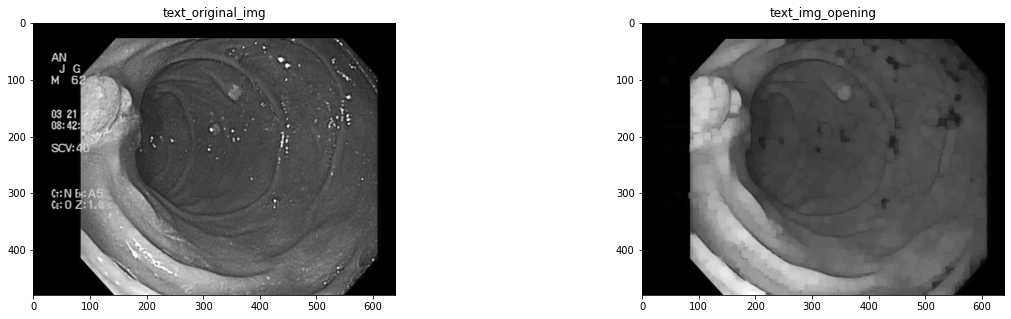

In [94]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(text_original_img, cmap='gray')
plt.title('text_original_img')


plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('text_img_opening')

Text(0.5, 1.0, 'text_result')

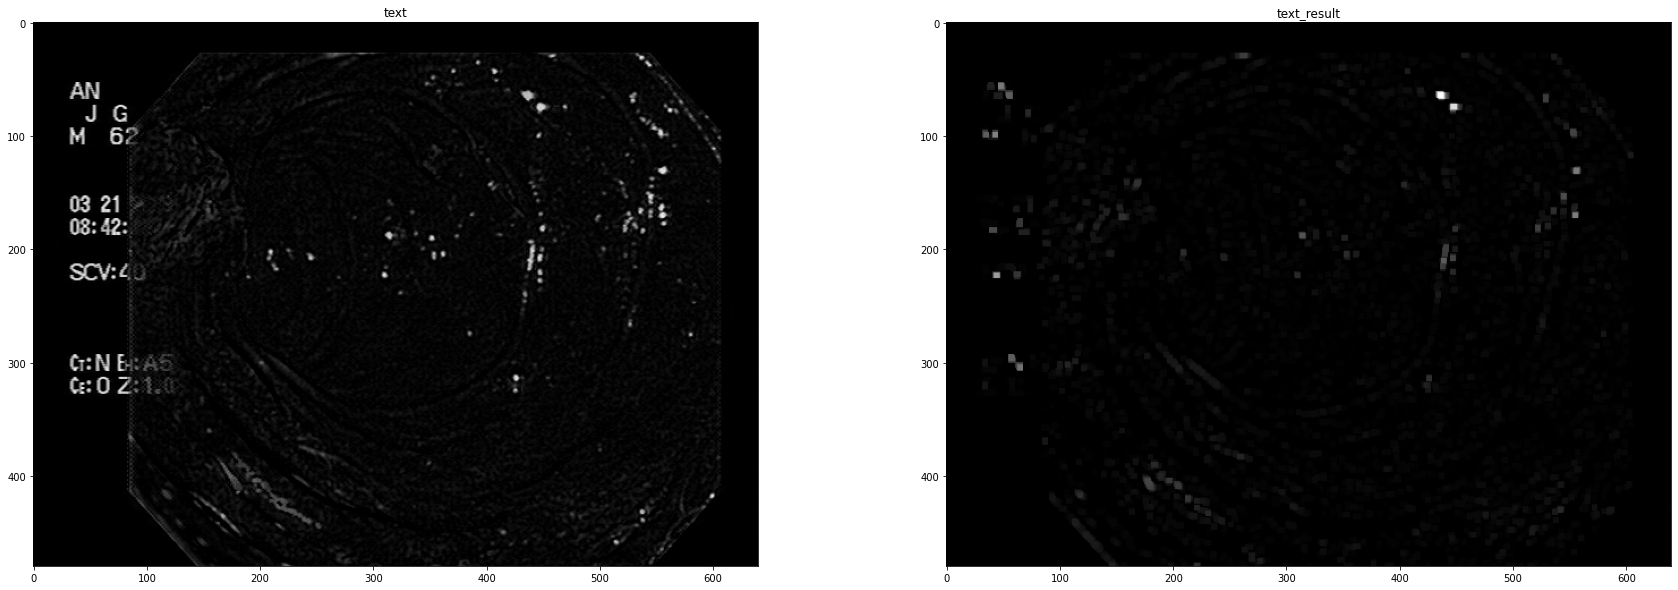

In [107]:
text = text_original_img - text_img_opening

kernel = np.ones((5,5), np.uint8)
text_result = cv2.morphologyEx(text, cv2.MORPH_OPEN, kernel)

fig = plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.imshow(text, cmap='gray')
plt.title('text')

plt.subplot(1, 2, 2)
plt.imshow(text_result, cmap='gray')
plt.title('text_result')

In [101]:
width = len(text[0])
height = len(text[1])

for i in range(width):
    for j in range(height):
        if text[i, j] ==   
    if text[:,i]
np.unique(text/255)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [113]:
text.shape

(480, 640)